In [1]:
### Imports for the Notebook

import numpy as np
import pandas as pd

import sys
import pickle

from fastai.vision.all import *
import torchvision.models as models
#from torchvision.prototype.models import resnet50
from utils import *
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
path_wiki = 'data/watches/ds3_crown/cleandata.csv'
path_imdb = 'data/watches/ds3_crown/images/'
img_size = 255

In [3]:
df = pd.read_csv(path_wiki, index_col=0)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=12)

In [4]:
data_imdb = ImageDataLoaders.from_df(df_train, path_imdb, cols=['Code'], folder ='.',item_tfms=Resize(img_size), y_block=RegressionBlock())

In [ ]:
data_imdb.show_batch()

In [6]:
tst = AvgMetric(lambda x,y: (x-y).abs().mean())

In [7]:
learn = vision_learner(data_imdb, resnet34, metrics=tst)
learn.loss = MSELossFlat

/Users/hpe/Library/Caches/pypoetry/virtualenvs/watch-price-prediction-Ec8ffj5t-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hpe/Library/Caches/pypoetry/virtualenvs/watch-price-prediction-Ec8ffj5t-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.25118863582611084)

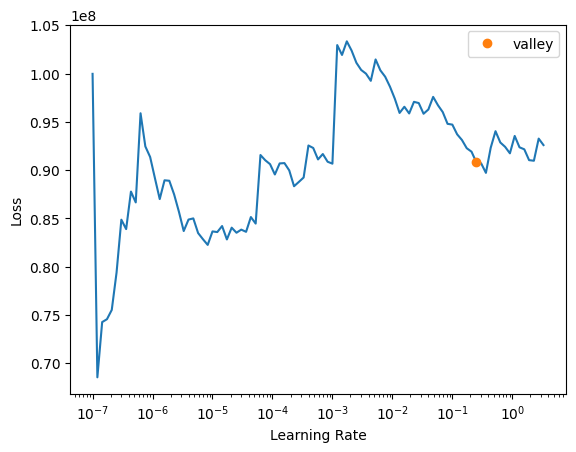

In [8]:
learn.lr_find()

In [8]:
learn.fine_tune(6, 10e-1)

epoch,train_loss,valid_loss,accuracy,time
0,28812082.000000,34207400.000000,0.000000,35:53


epoch,train_loss,valid_loss,accuracy,time
0,33230586.000000,26406106955776.000000,0.000000,40:07
1,27430158.000000,52335300.000000,0.000000,40:31
2,26949680.000000,34534784.000000,0.000000,40:18
3,20981448.000000,30307262.000000,0.000000,38:15
4,18497802.000000,2954003712.000000,0.000000,37:24
5,17529366.000000,21090252.000000,0.000000,38:05
